<a href="https://colab.research.google.com/github/MathieuFan22/Mirada-Examen-ML-M2-ISPM/blob/Safidy/PoketraFinday-Mirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [127]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-null  int64 
 2   type            30000 non-null  object
 3   amount          30000 non-null  int64 
 4   customer_id     30000 non-null  object
 5   age             30000 non-null  int64 
 6   is_fraud        30000 non-null  int64 
 7   hour            30000 non-null  int64 
 8   day             30000 non-null  int64 
 9   day_of_week     30000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.3+ MB


In [129]:
print(train_data.duplicated().sum())

0


In [124]:
train_data['hour'] = (train_data['step'] - 1) % 24
train_data['day_of_week'] = ((train_data['step'] - 1) // 24) % 7
train_data['day'] = ((train_data['step'] - 1) // 24) + 1

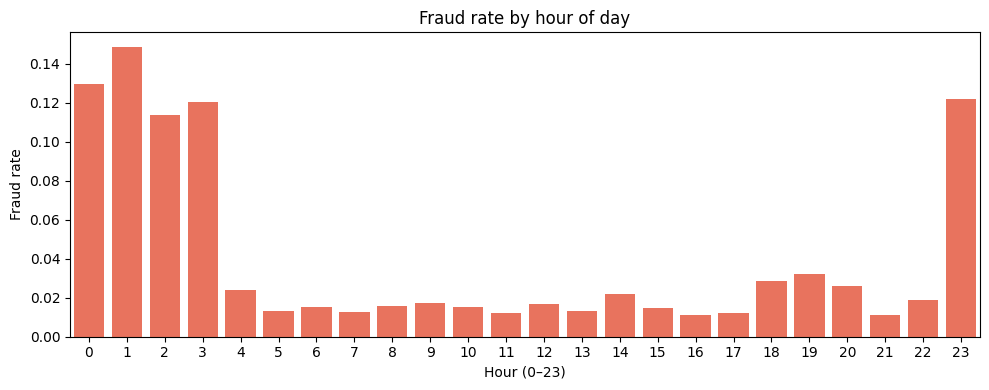

In [125]:
plt.figure(figsize=(10,4))
hour_stats = train_data.groupby('hour')['is_fraud'].mean()
sns.barplot(x=hour_stats.index, y=hour_stats.values, color='tomato')
plt.title("Fraud rate by hour of day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.show()

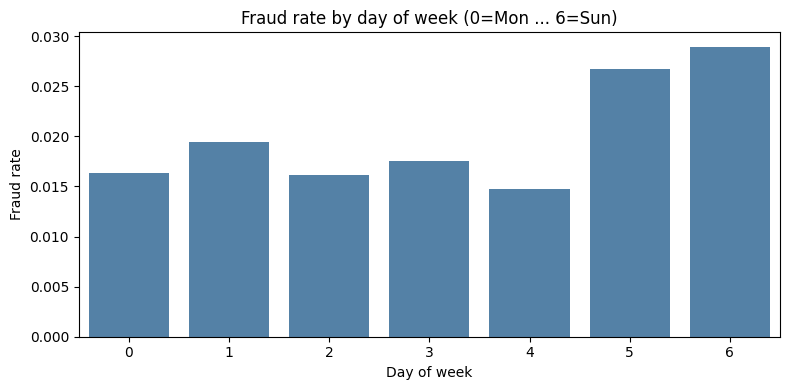

In [126]:
plt.figure(figsize=(8,4))
dow_stats = train_data.groupby('day_of_week')['is_fraud'].mean()
sns.barplot(x=dow_stats.index, y=dow_stats.values, color='steelblue')
plt.title("Fraud rate by day of week (0=Mon ... 6=Sun)")
plt.xlabel("Day of week")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.show()

## Conclusion: Heure a une impact sur les fraudes

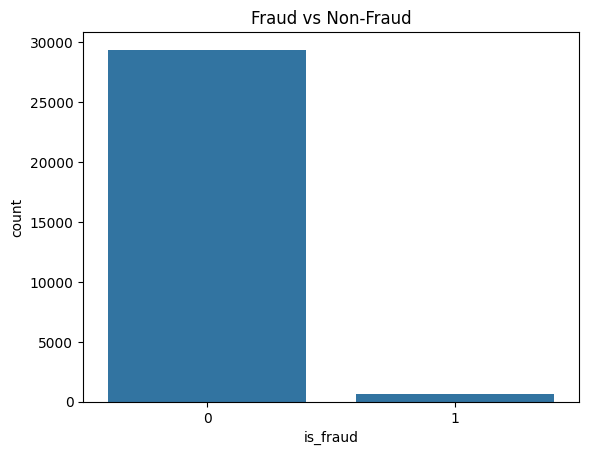

In [131]:
sns.countplot(x='is_fraud', data=train_data)
plt.title("Fraud vs Non-Fraud")
plt.show()

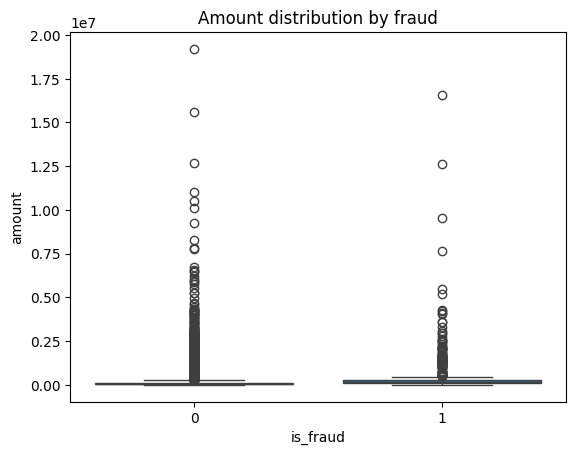

In [146]:
sns.boxplot(x='is_fraud', y='amount', data=train_data)
plt.title("Amount distribution by fraud")
plt.show()

In [144]:
import numpy as np
min = train_data['amount'].min()
max = train_data['amount'].max()
amount_groups = np.linspace(min, max, 11)
train_data['amount_group'] = pd.cut(train_data['amount'], bins=amount_groups)
train_data.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud,hour,day,day_of_week,amount_group
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,12,18,3,"(100.0, 1921490.0]"
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,12,14,6,"(100.0, 1921490.0]"
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,12,24,2,"(100.0, 1921490.0]"
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,6,22,0,"(100.0, 1921490.0]"
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,14,3,2,"(100.0, 1921490.0]"


TypeError: Invalid object type at position 0

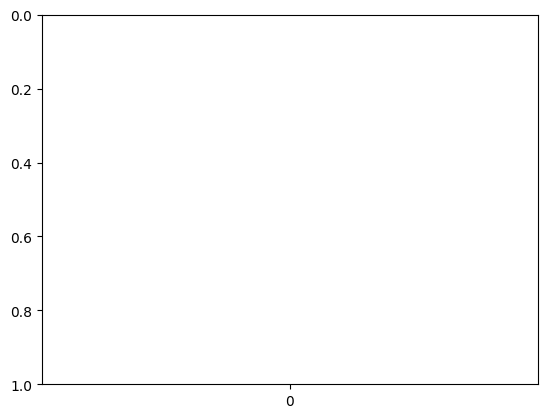

In [148]:
sns.boxplot(x='is_fraud', y='amount_group', data=train_data)
plt.title("Amount distribution by fraud")
plt.show()